In [1]:
import numpy as np  # mathematical operations on arrays and matrices
import pandas as pd # data manipulation and analysis
import seaborn as sns # data visualization and plotting
from sklearn.cluster import KMeans # clustering analysis using KMeans algorithm
import warnings 
warnings.filterwarnings("ignore") # ignoring any warnings that may occur during the analysis
from matplotlib import pyplot as plt # creating visualizations and plots
from pylab import rcParams # creating scientific and technical graphics using Python.
%matplotlib inline 
# magic command for Jupyter Notebook that allows the plots to be displayed inline within the notebook.
import warnings 
warnings.filterwarnings("ignore")

In [2]:
# reading a CSV file called "AirPassengers.csv" from the file path and storing the data in a pandas DataFrame called data_ap.
data_ap = pd.read_csv(r"C:\Users\niraj\Downloads\AirPassengers.csv")

In [3]:
# checking informaton of DataFrame
data_ap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [4]:
# telling pandas to parse the 'Month' column as a date column, instead of treating it as a string object.
data_ap = pd.read_csv(r"C:\Users\niraj\Downloads\AirPassengers.csv", parse_dates=['Month'])

In [5]:
# telling pandas to use the 'Month' column as the index of the DataFrame
data_ap = pd.read_csv(r"C:\Users\niraj\Downloads\AirPassengers.csv", parse_dates=['Month'], index_col='Month')

In [6]:
data_ap.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


# Data preprocessing and Exploratory analysis

In [7]:
# renaming column'#passangers' to 'Passnumber'
data_ap.rename({'#Passengers':'passnumber'},axis=1, inplace=True)

In [8]:
data_ap.head()

,passnumber
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


<Axes: xlabel='passnumber', ylabel='Density'>

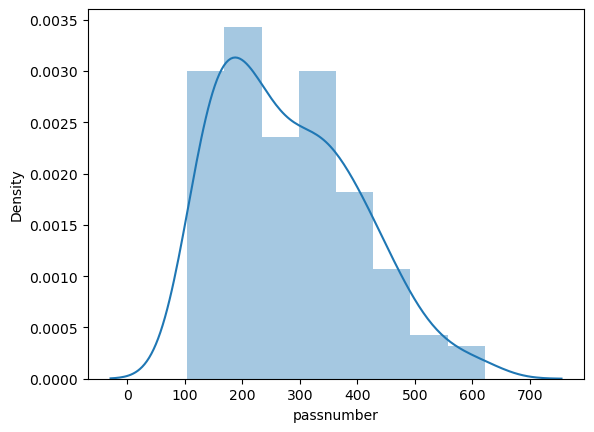

In [9]:
# plotting ditribution plot of column 'passnumber'
sns.distplot(data_ap['passnumber'])

In [10]:
# stastical analysis of column'passnumber'
data_ap['passnumber'].describe()

count    144.000000
mean     280.298611
std      119.966317
min      104.000000
25%      180.000000
50%      265.500000
75%      360.500000
max      622.000000
Name: passnumber, dtype: float64

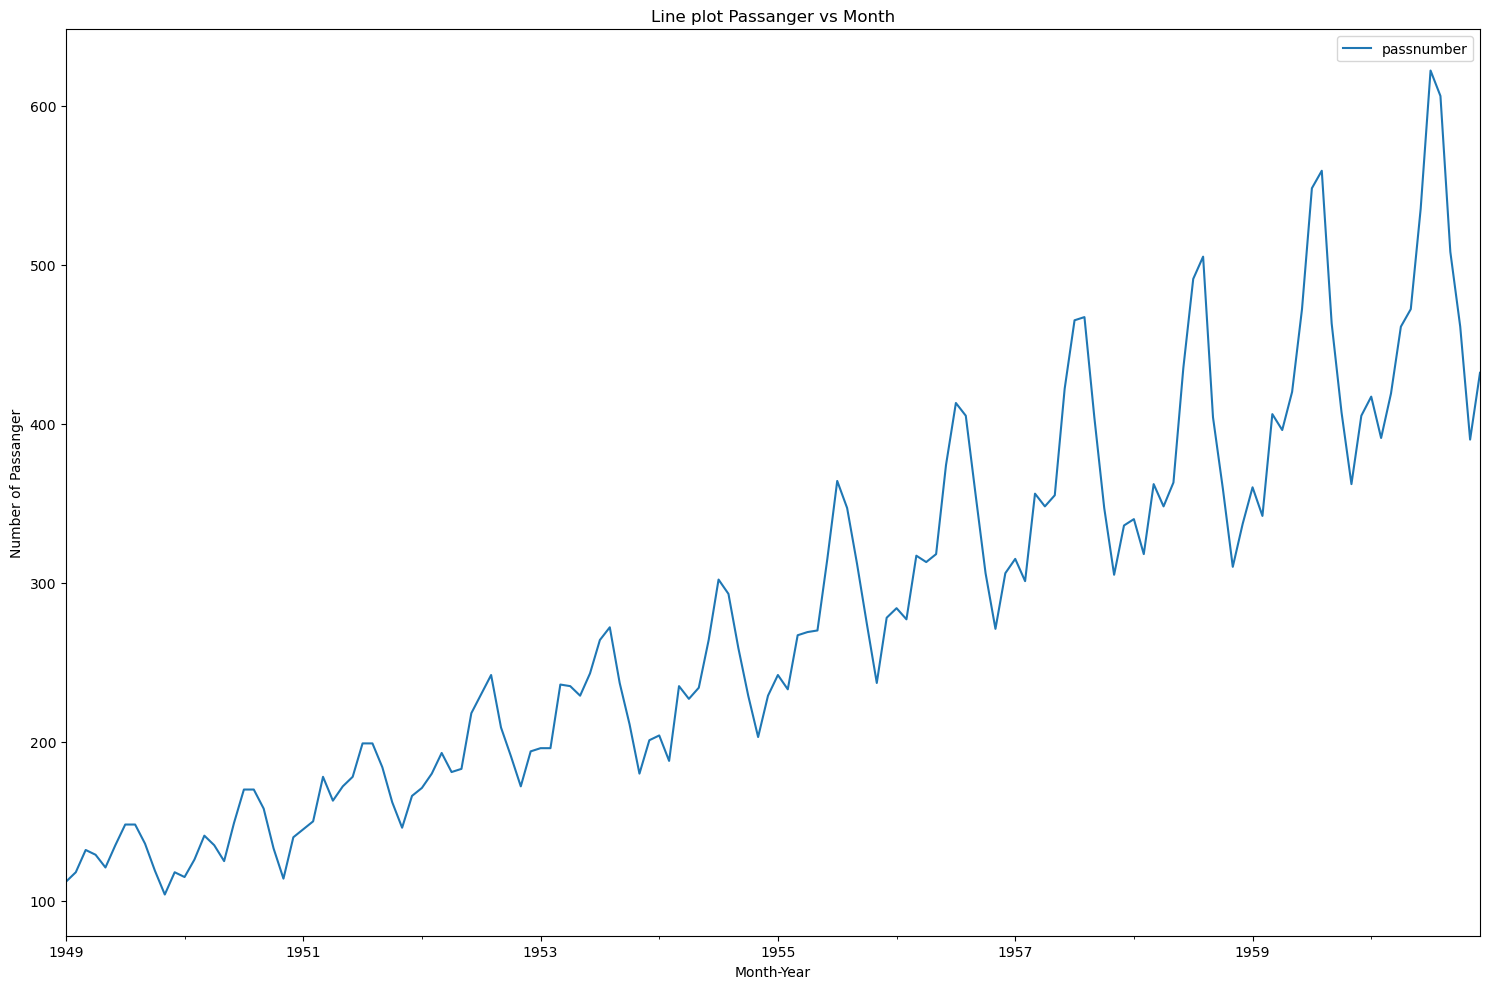

In [11]:
#  plotting all columns (number of passanger) in the DataFrame against the DataFrame's index, which in this case is the 'Month' column.
rcParams['figure.figsize']=15,10
data_ap.plot()
plt.xlabel('Month-Year')
plt.ylabel('Number of Passanger')
plt.title('Line plot Passanger vs Month')
plt.tight_layout()
plt.show()

### The dataset has an increasing trend, as can be observed from the graph. Additionally, while the trend and seasonality are both growing, there is non-stationary movement in the sample. 

<Figure size 1000x1000 with 0 Axes>

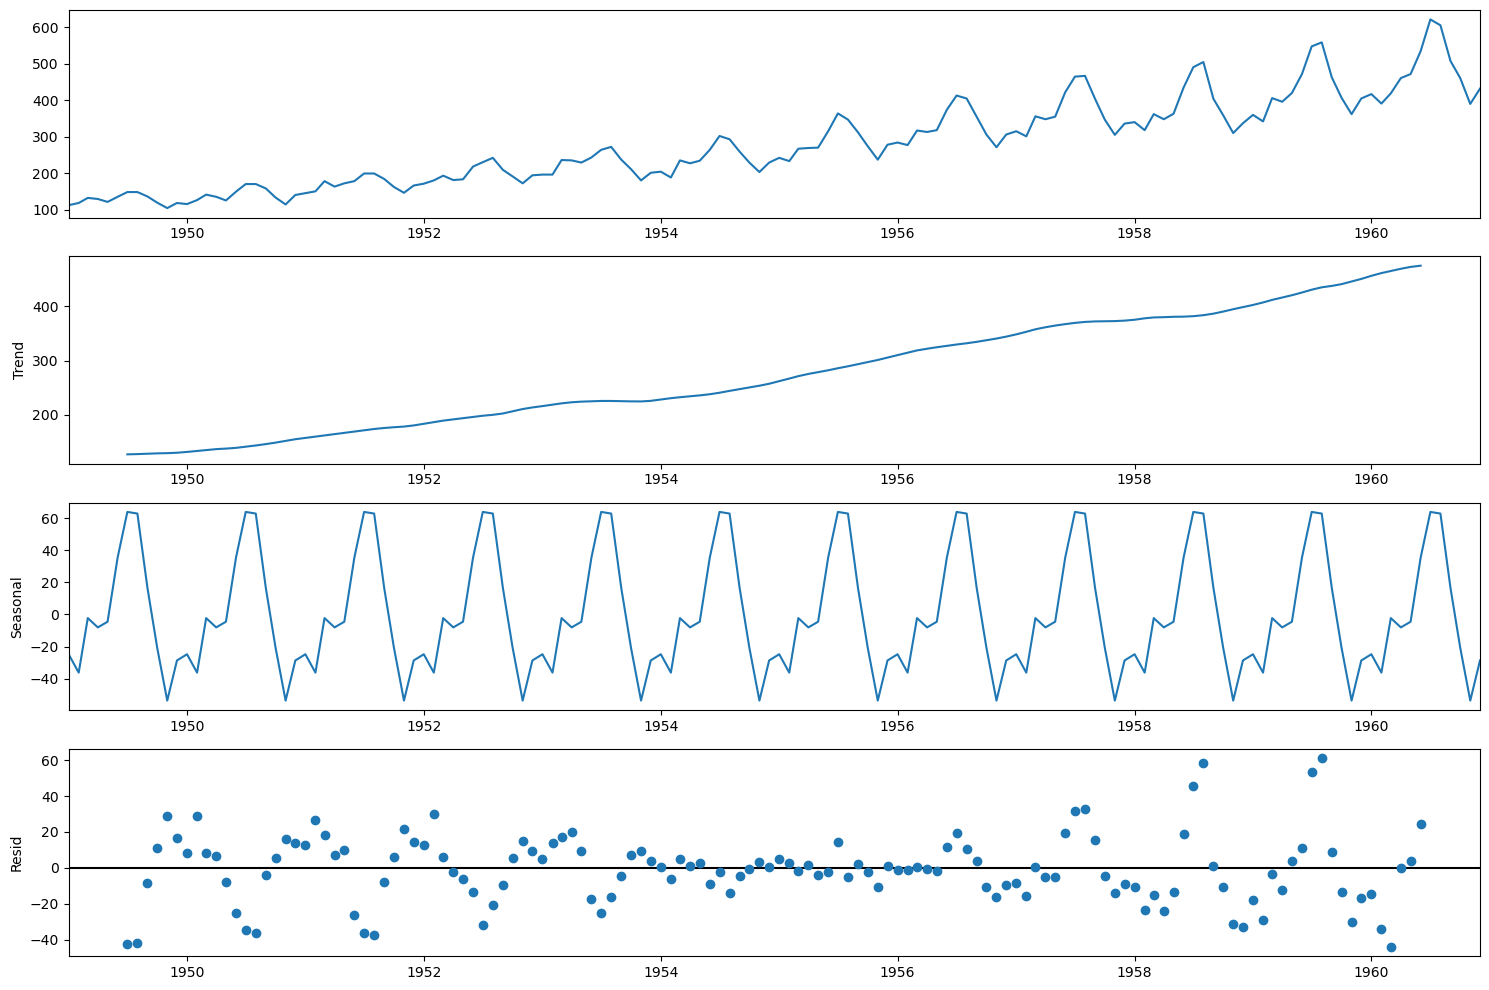

In [12]:
# decomposing the time series by (additive model) to identify trends and seasonal patterns
from statsmodels.tsa.seasonal import seasonal_decompose
decompositionforadd = seasonal_decompose(data_ap, model='additive')
plt.figure(figsize=(10, 10))
decompositionforadd.plot()
plt.show()

<Figure size 1000x1000 with 0 Axes>

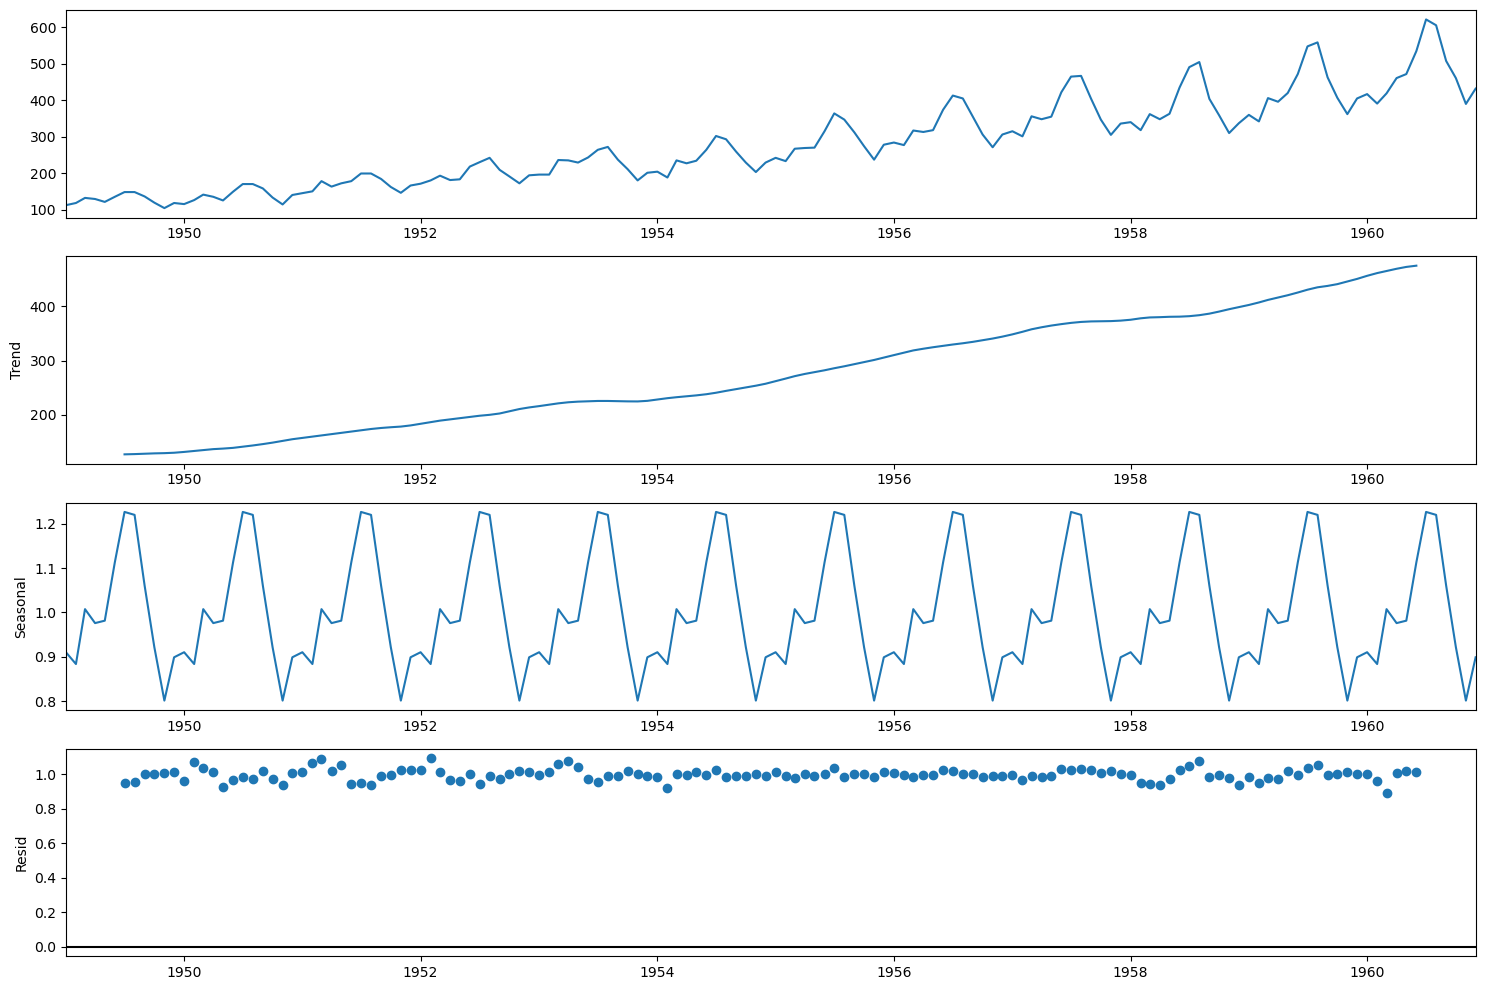

In [13]:
decompositionformul = seasonal_decompose(data_ap, model='multiplicative')
plt.figure(figsize=(10, 10))
decompositionformul.plot()
plt.show()

In [14]:
# checking stationarity in the dataset
from statsmodels.tsa.stattools import adfuller

# performing ADF test on time series data
result = adfuller(data_ap['passnumber'])

In [15]:
# printing test statistic and p-value
print('ADF Statistic: {:.2f}'.format(result[0]))
print('p-value: {:.2f}'.format(result[1]))

ADF Statistic: 0.82
p-value: 0.99


#### The Augmented Dickey-Fuller (ADF) statistic of 0.82 is a measure of how strongly a time series is affected by a trend. A value of 0.82 indicates that the series is still likely to have a trend component.

#### The p-value of 0.99 indicates that there is a high probability that the ADF statistic was obtained by chance and does not reflect a true relationship between the trend and the series. Therefore, we cannot reject the null hypothesis that the series has a unit root (i.e., non-stationary).

#### the result suggests that the time series is likely non-stationary and contains a trend component.

In [16]:
# interpreting p-value
if result[1] < 0.05:
    print('The time series is stationary')
else:
    print('The time series is non-stationary')

The time series is non-stationary


In [17]:
copied_ap = data_ap.copy()

In [18]:
# apply log transformation to remove multiplicative seasonality
copied_ap['passnumber'] = np.log(data_ap)

In [19]:
copied_ap.head()

,passnumber
Month,
1949-01-01,4.718499
1949-02-01,4.770685
1949-03-01,4.882802
1949-04-01,4.859812
1949-05-01,4.795791


In [20]:
# performing ADF test on copied_ap series data
result1 = adfuller(copied_ap['passnumber'])
# printing test statistic and p-value
print('ADF Statistic: {:.2f}'.format(result1[0]))
print('p-value: {:.2f}'.format(result1[1]))

ADF Statistic: -1.72
p-value: 0.42


In [21]:
# interpreting p-value
if result1[1] < 0.05:
    print('The time series is stationary')
else:
    print('The time series is non-stationary')

The time series is non-stationary


In [22]:
# taking first difference to remove trend and make data stationary
copied_ap_diff =copied_ap.diff().dropna() 

In [23]:
# performing ADF test on copied_ap_diff series data
result2 = adfuller(copied_ap_diff['passnumber'])
# printing test statistic and p-value
print('ADF Statistic: {:.2f}'.format(result2[0]))
print('p-value: {:.2f}'.format(result2[1]))

ADF Statistic: -2.72
p-value: 0.07


#### ADF value of -2.72 indicates that the series is less likely to have a trend component compared to a value of 0 or positive.
#### The p-value of 0.07 indicates that there is a moderate probability that the ADF statistic is a result of chance and does not reflect a true relationship between the trend and the series. Therefore, we may or may not reject the null hypothesis that the series has a unit root (i.e., non-stationary) depending on the level of significance chosen for the test.

In [24]:
# interpreting p-value
if result2[1] < 0.05:
    print('The time series is stationary')
else:
    print('The time series is non-stationary')

The time series is non-stationary


In [25]:
# remove seasonality using second order differencing
diff_seasonal = data_ap.diff(periods=12).diff().dropna()
#  applied a seasonal differencing of 12 periods followed by a first-order difference to the original time series, which has resulted in a new differenced series

In [26]:
# performing ADF test on copied_ap_diff series data
result3 = adfuller(diff_seasonal['passnumber'])
# printing test statistic and p-value
print('ADF Statistic: {:.2f}'.format(result3[0]))
print('p-value: {:.2f}'.format(result3[1]))

ADF Statistic: -15.60
p-value: 0.00


###  An ADF statistic of -15.60 and a p-value of 0.00 indicate strong evidence against the null hypothesis that the time series has a unit root and is non-stationary. Therefore, we can reject the null hypothesis in favor of the alternative hypothesis that the time series is stationary.

In [27]:
# interpreting p-value
if result3[1] < 0.05:
    print('The time series is stationary')
else:
    print('The time series is non-stationary')

The time series is stationary


# Visualizing data 
## Time-series plot

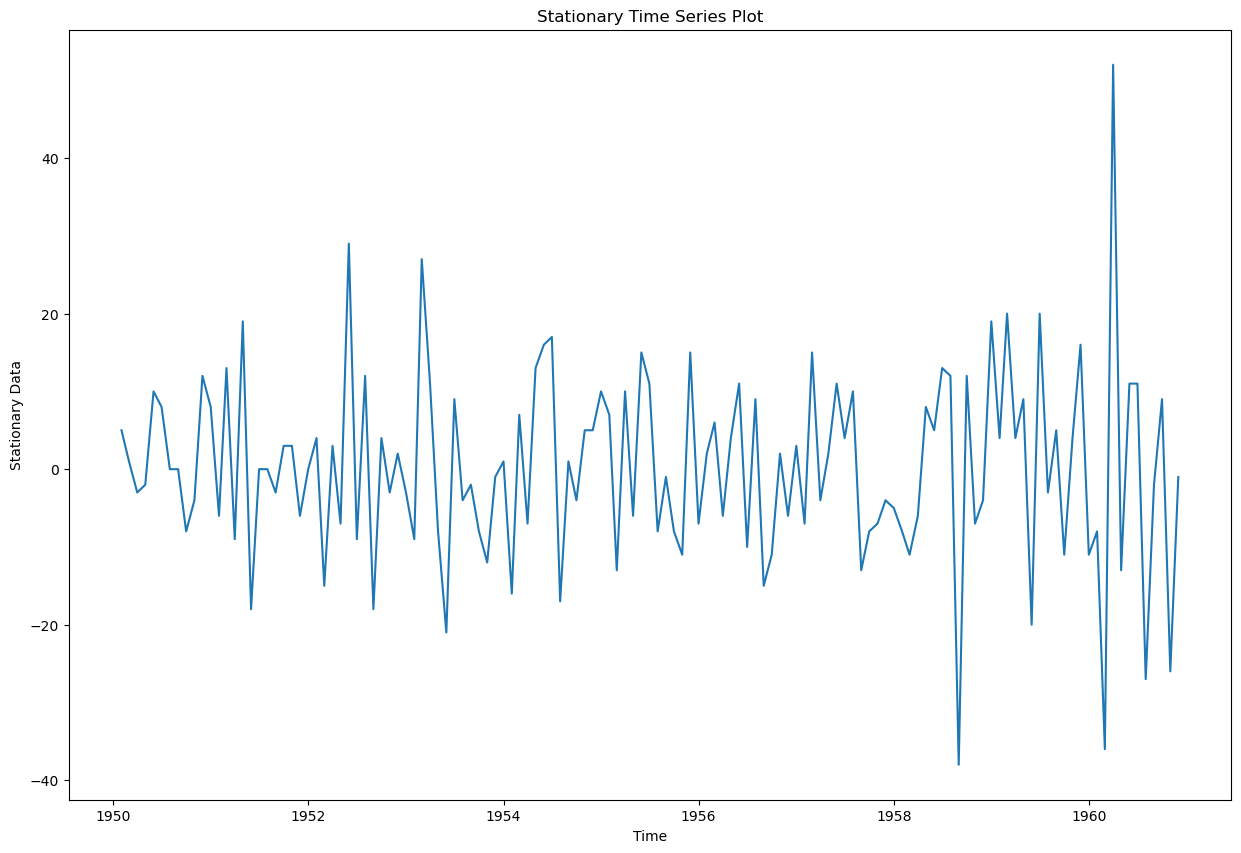

In [28]:
# the stationary data is stored in a pandas dataframe called 'diff_seasonal'
plt.plot(diff_seasonal.index, diff_seasonal['passnumber'])
plt.title('Stationary Time Series Plot')
plt.xlabel('Time')
plt.ylabel('Stationary Data')
plt.show()

### Looking at the graph,the variations in variance that we observed in the differenced time series plot after 1960 could be due to residual effects that were not captured by the differencing process. These residual effects could be due to other sources of non-stationarity in the data that were not addressed by the seasonal and first-order differencing.

## Autocorrelation plot

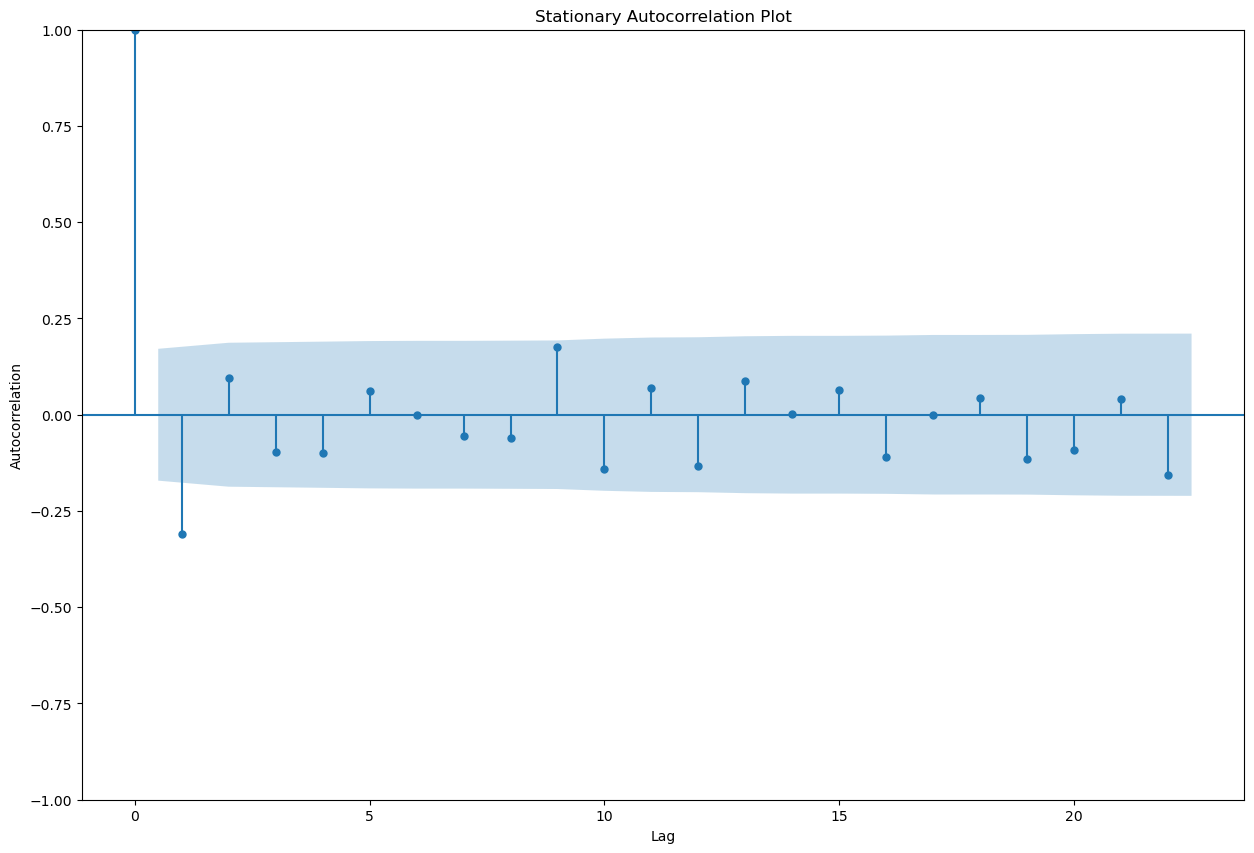

In [29]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(diff_seasonal)
plt.title('Stationary Autocorrelation Plot')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

#### first column of your autocorrelation plot is equal to 1, this indicates that the time series is perfectly correlated with itself at lag 0 (i.e., the autocorrelation at lag 0 is 1, which is the maximum possible value). This is expected since any time series is perfectly correlated with itself at the same time point.
#### the rest of the columns in the plot fall in between -0.25 and +0.25, this indicates that the autocorrelation values for the various lags are relatively small and not significantly different from zero. Autocorrelation values in this range suggest that there is no significant correlation between the observations at different lags, which is a characteristic of a stationary time series.

# Partial autocorrelation plot

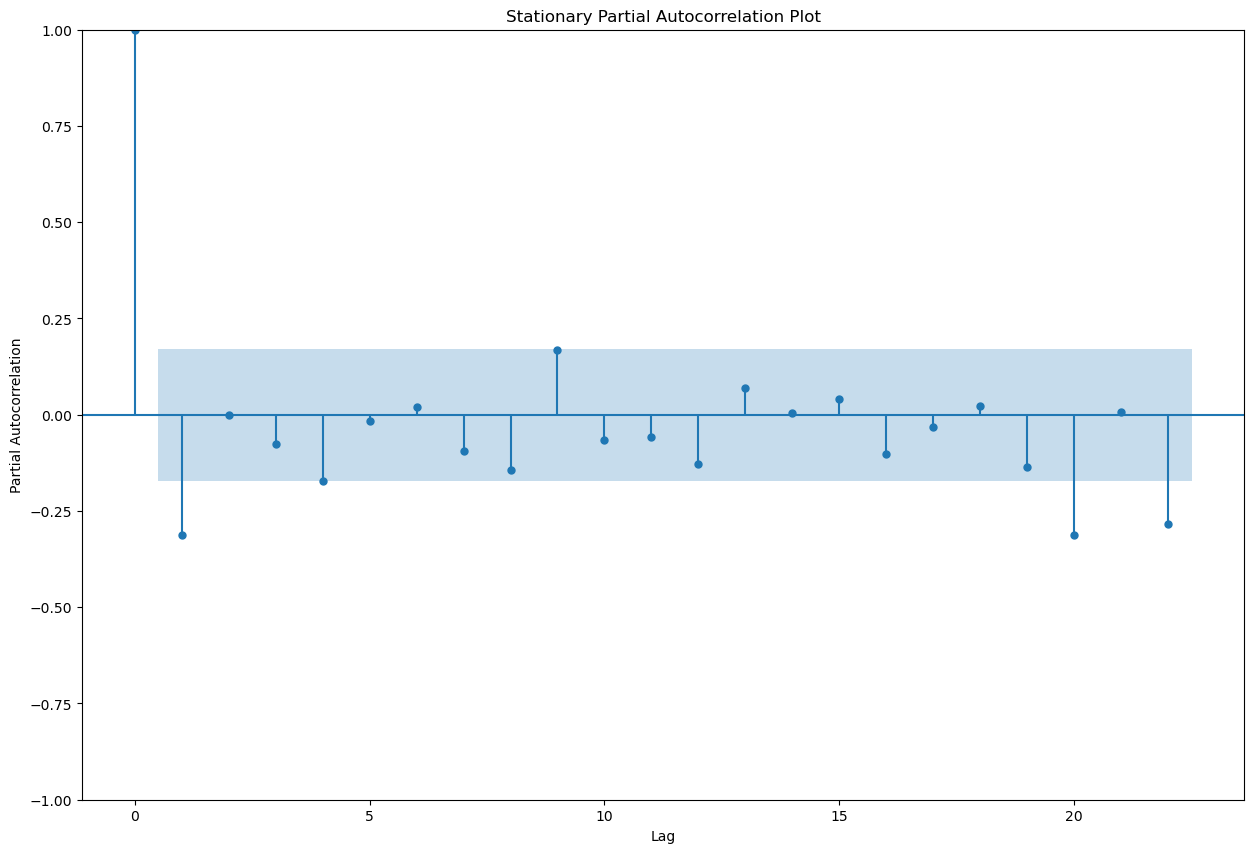

In [30]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(diff_seasonal)
plt.title('Stationary Partial Autocorrelation Plot')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.show()

## Histogram plot

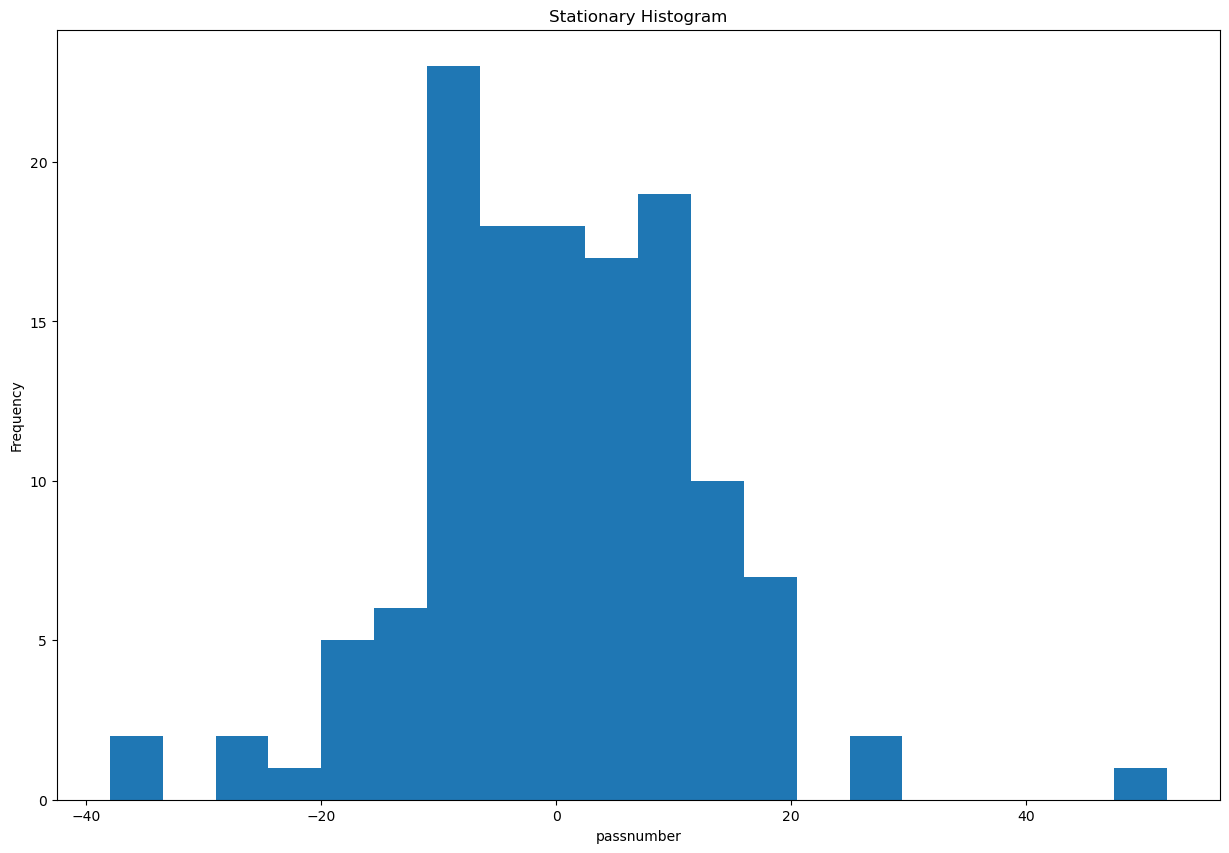

In [31]:
plt.hist(diff_seasonal, bins=20)
plt.title('Stationary Histogram')
plt.xlabel('passnumber')
plt.ylabel('Frequency')
plt.show()


## Box plot 

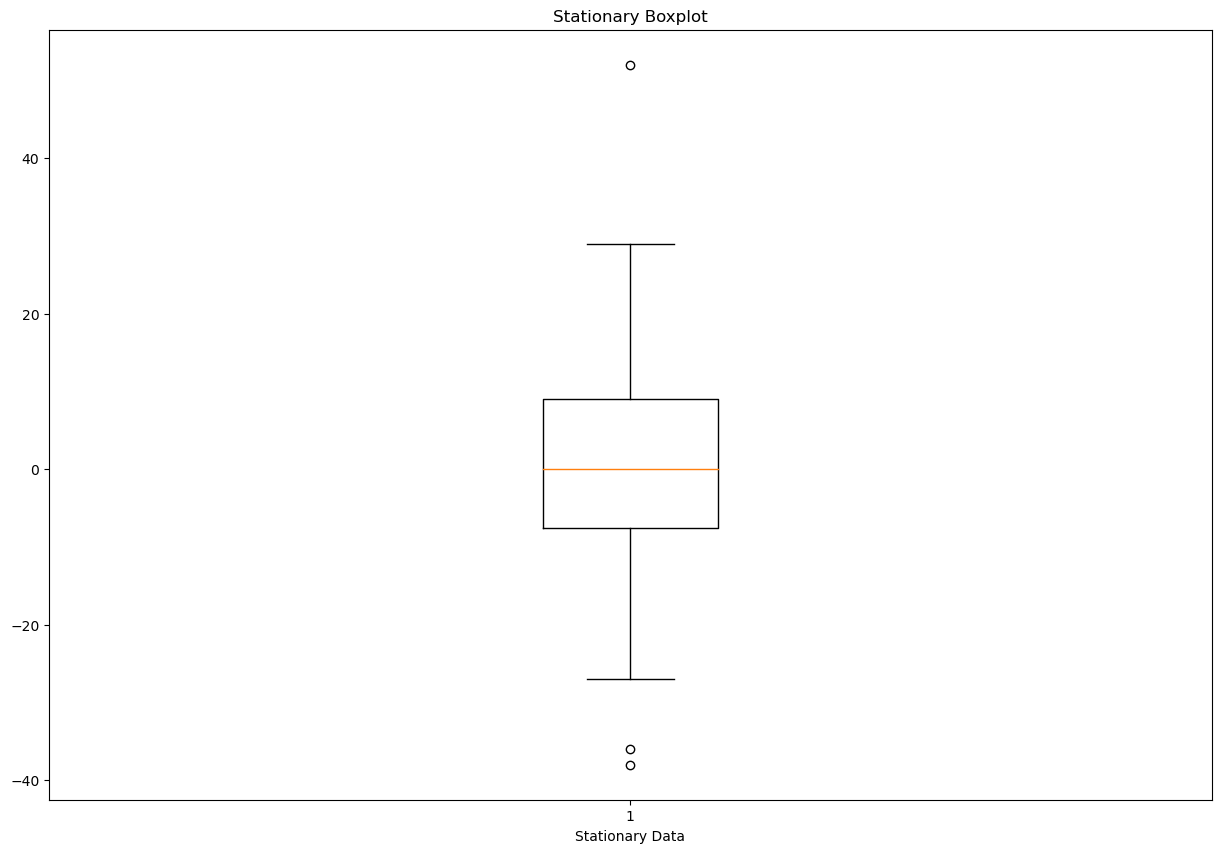

In [32]:
plt.boxplot(diff_seasonal['passnumber'])
plt.title('Stationary Boxplot')
plt.xlabel('Stationary Data')
plt.show()

# Building Model And Evaluating

In [33]:
# importing two time series models, ARIMA and SARIMAX, from the statsmodels library
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from math import sqrt

In [34]:
# creating a NumPy array x containing the differenced values of data ts_df
x = diff_seasonal.values

In [35]:
x.shape

(131, 1)

In [36]:
# splitting numpy array into training and testing dataset. 
train = x[0:115]
test = x[114:]

In [37]:
# checking their shapes 
train.shape, test.shape

((115, 1), (17, 1))

In [38]:
import itertools 

In [39]:
# defining the range of the parameters p,d,q
p_values = (0,3)
d_values = (0,3)
q_values = (0,3)
# creating a list of all possible combinations of the values in the p_values, d_values, and q_values lists.
pdq_combinations = list(itertools.product(p_values,d_values,q_values))

In [40]:
# initializing the variables best_rmse and best_model with a very large value and a null value
best_rmse = float('inf')
best_model = None

In [41]:
#  performing a grid search over all combinations of p, d, and q values using a SARIMAX model. 
# trying to fit a SARIMAX model to the training data for each combination of p, d, and q values, and then evaluates the resulting model by computing its RMSE on the test data. 
for pdq in pdq_combinations:
    try:
        model = SARIMAX(train, order=pdq, seasonal_order=(0, 0, 0, 0))
        result = model.fit()
        prediction = result.predict(start=115, end=131)
        rmse = np.sqrt(mean_squared_error(test, prediction))
        
        if rmse < best_rmse:
            best_rmse = rmse 
            best_model = result
    except:
        continue 

if best_model is not None:
    print(f'Best model: {best_model.summary()}')
else:
    print('No models were successfully fitted.')


No models were successfully fitted.


C:\Users\niraj\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


### We did not acheived any good fit or result. So, we increased the range of (P,D,Q) and perform the same steps as above. With introducing  seasonal_order parameter to (0, 0, 0, 12, 'A'). which means that there is a seasonal component with a period of 12 (i.e., the data has a yearly seasonality) and the seasonal data is assumed to be additive (as denoted by the 'A' argument).

In [42]:
# defining the range of the parameters p,d,q
p_values = (0,7)
d_values = (0,7)
q_values = (0,7)
pdq_combinations = list(itertools.product(p_values,d_values,q_values))

In [43]:
best_rmse = float('inf')
best_model = None

In [44]:
for pdq in pdq_combinations:
    try:
        model = SARIMAX(train, order=pdq, seasonal_order=(0, 0, 0, 12, 'A'))
        result = model.fit()
        prediction = result.predict(start=115, end=131)
        rmse = np.sqrt(mean_squared_error(test, prediction))
        
        if rmse < best_rmse:
            best_rmse = rmse 
            best_model = result
    except:
        continue 

if best_model is not None:
    print(f'Best model: {best_model.summary()}')
else:
    print('No models were successfully fitted.')


No models were successfully fitted.


#### Again, we did not acheive the best fit/model for the data. So again, With introducing seasonal_order parameter to (0, 0, 0, 12, 'M'). which means that there is a seasonal component with a period of 12 (i.e., the data has a yearly seasonality) and the seasonal data is assumed to be Multiplicative (as denoted by the 'M' argument).¶

In [45]:
for pdq in pdq_combinations:
    try:
        model = SARIMAX(train, order=pdq, seasonal_order=(0, 0, 0, 12, 'M'))
        result = model.fit()
        prediction = result.predict(start=115, end=131)
        rmse = np.sqrt(mean_squared_error(test, prediction))
        
        if rmse < best_rmse:
            best_rmse = rmse 
            best_model = result
    except:
        continue 

if best_model is not None:
    print(f'Best model: {best_model.summary()}')
else:
    print('No models were successfully fitted.')


No models were successfully fitted.


#### After grid search we did not find any best fit in that range so we are trying to order (1,1,1) to check what could be the RMSE 

# Sarimax for p,d,q = 1,1,1 and seasonality = 12

In [46]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
model = SARIMAX(train, order=(1,1,1), seasonal_order=(1,1,1,12))
results = model.fit()

# make predictions for the testing set using the fitted model
predictions = results.predict(start=115, end=131)

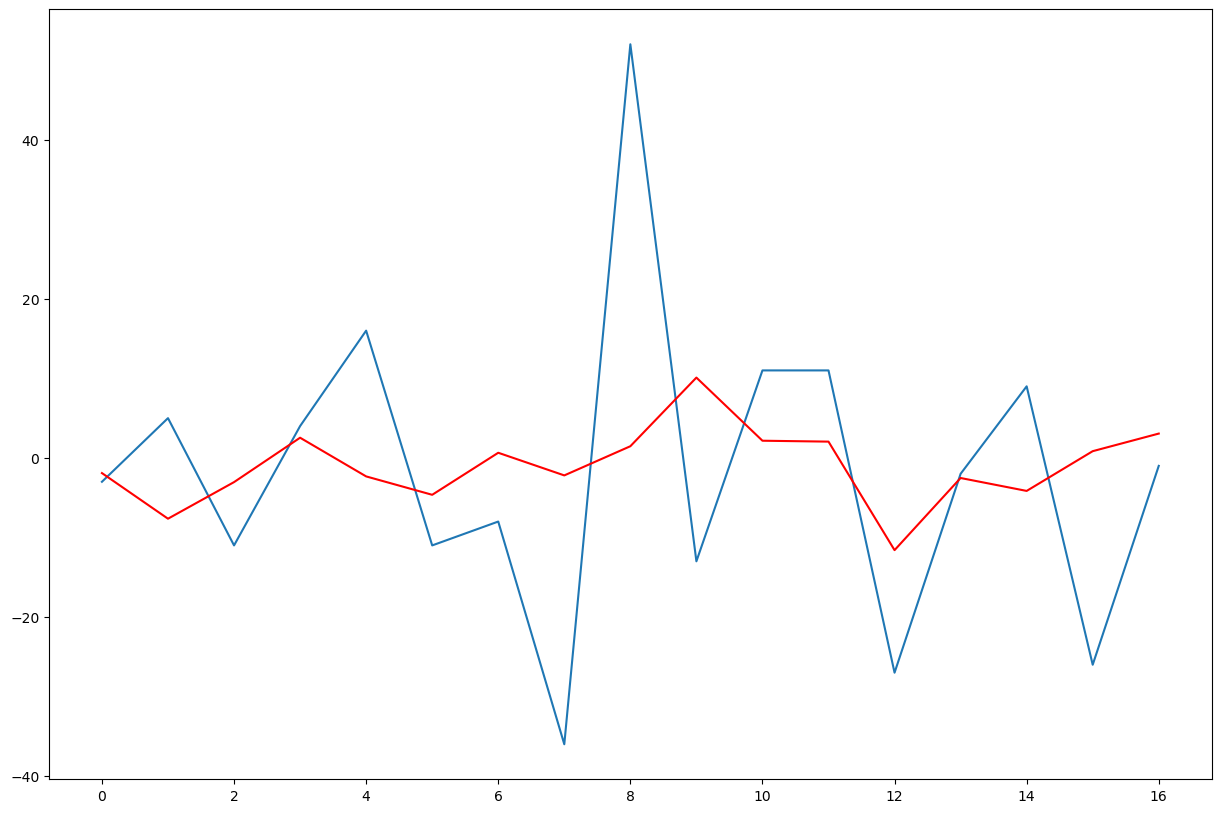

In [47]:
plt.plot(test)
plt.plot(predictions, color='red')

In [54]:
# Evaluating the model's performance by calculating the mean absolute error (MAE), (MSE), (RMSE) and R2.
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score

mae = mean_absolute_error(test, predictions)
print('MAE:', mae)


mse = mean_squared_error(test, predictions)
print('MSE:', mse)


rmse = np.sqrt(mse)
print('RMSE:', rmse)


r2 = r2_score(test, predictions)
print('R2 score:', r2)

MAE: 14.21750086532875
MSE: 365.47010862883695
RMSE: 19.117272520650978
R2 score: 0.038394167831407366


### The results obtained from the model suggest that the model's predictions have a relatively high mean absolute error (MAE) of 14.22 and a relatively high root mean squared error (RMSE) of 19.12. The model's R-squared score of 0.038 indicates that the model explains only a small proportion of the variance in the data.

### Overall, while the model may be useful in capturing some of the patterns and trends in the data, it may not be accurate enough to be relied on for precise predictions. It may be worth considering other models or refining the parameters of this model to improve its accuracy.

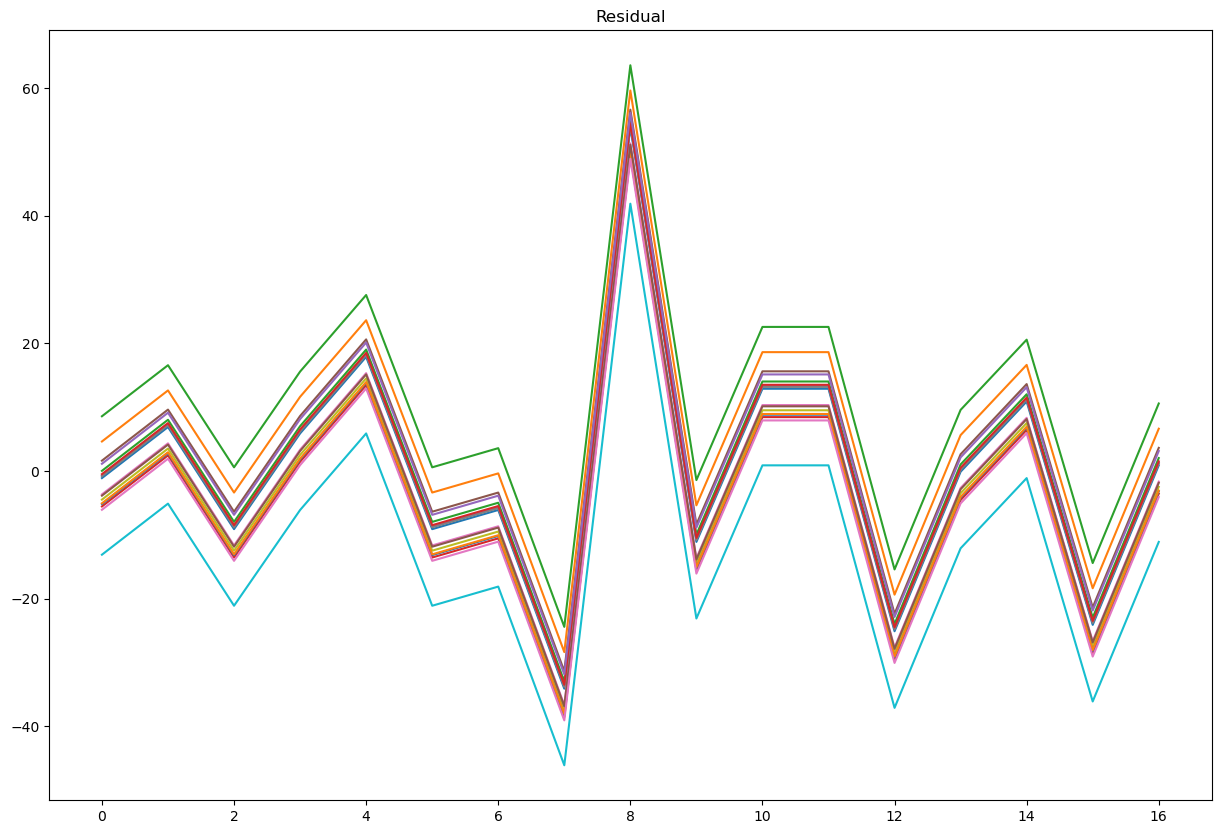

In [60]:
residual = test - predictions
plt.plot(residual)
plt.title('Residual')
plt.show()

# Sarima for p,d,q = 1,1,1 and seasonality = 12 and additive model'A'

In [56]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model1 = SARIMAX(train, order=(1,1,1), seasonal_order=(1, 1, 1, 12), trend='c', enforce_invertibility=False, enforce_stationarity=False)
results1 = model.fit()

predictions1 = results1.predict(start=115, end=131, dynamic=False, typ='levels')


In [57]:
predictions1

array([ -1.90680255,  -7.64193802,  -3.04136946,   2.53938881,
        -2.32490361,  -4.63709294,   0.64805155,  -2.19871793,
         1.4686912 ,  10.09736276,   2.1614662 ,   2.04740967,
       -11.59436694,  -2.52543213,  -4.14911181,   0.84667405,
         3.05934649])

In [66]:
mae = mean_absolute_error(test, predictions1)
print('MAE:', mae)


mse = mean_squared_error(test, predictions1)
print('MSE:', mse)


rmse = np.sqrt(mse)
print('RMSE:', rmse)


r2 = r2_score(test, predictions1)
print('R2 score:', r2)

MAE: 14.21750086532875
MSE: 365.47010862883695
RMSE: 19.117272520650978
R2 score: 0.038394167831407366


In [62]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model2 = SARIMAX(train, order=(1,1,1), seasonal_order=(1, 1, 1, 12), trend='c', enforce_invertibility=False, enforce_stationarity=False)
results2 = model.fit()

predictions2 = results2.predict(start=115, end=131, dynamic=False, typ='linear')


In [63]:
predictions2

array([ 3.49894854e+00, -1.10919397e+00,  1.30667958e+00, -1.30931294e-03,
        7.04127592e-01,  3.23490908e-01,  5.28862133e-01,  4.18054078e-01,
        4.77840525e-01,  4.45582766e-01,  4.62987429e-01,  4.53596749e-01,
        4.58663487e-01,  4.55929730e-01,  4.57404728e-01,  4.56608893e-01,
        4.57038286e-01])

In [67]:
mae = mean_absolute_error(test, predictions2)
print('MAE:', mae)


mse = mean_squared_error(test, predictions2)
print('MSE:', mse)


rmse = np.sqrt(mse)
print('RMSE:', rmse)


r2 = r2_score(test, predictions2)
print('R2 score:', r2)

MAE: 14.876729686090384
MSE: 388.2857318376577
RMSE: 19.704967186921618
R2 score: -0.021637106475746792


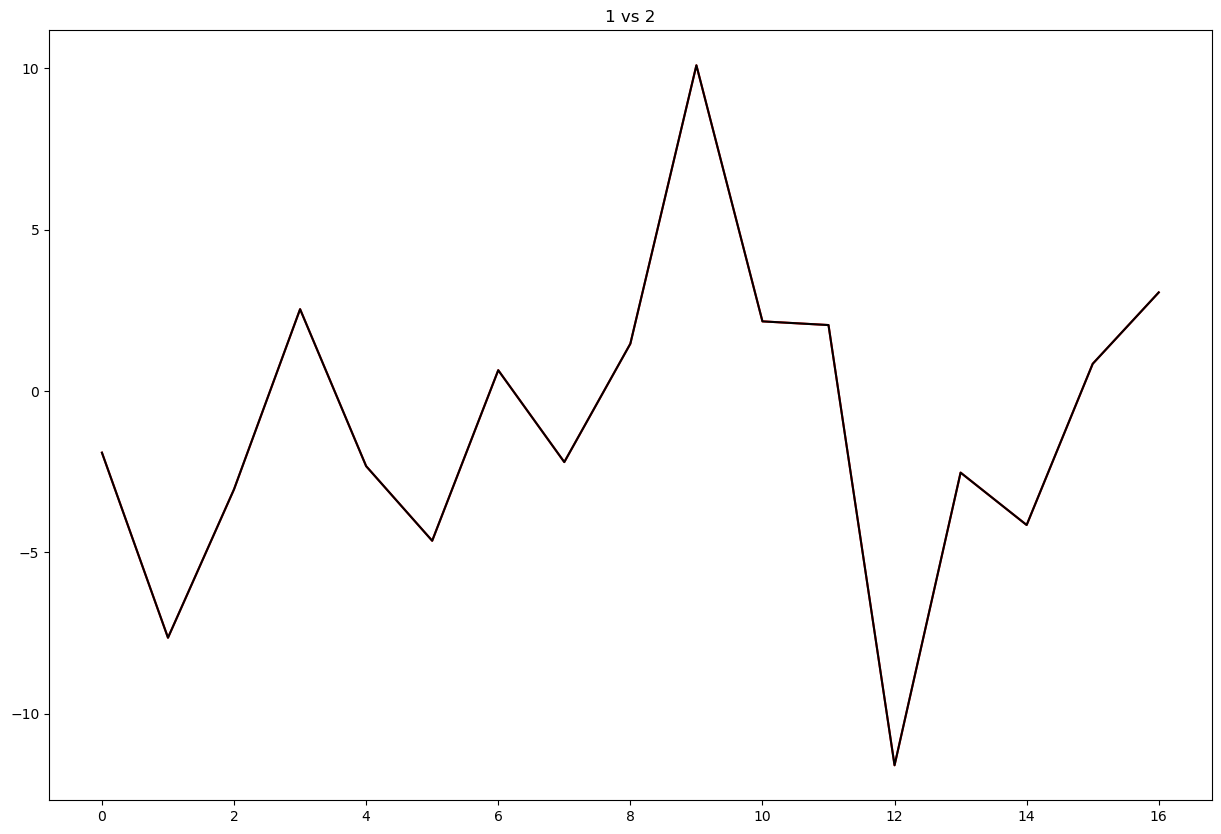

In [68]:
plt.plot(predictions1, color='red')
plt.plot(predictions1, color='black')
plt.title('1 vs 2')
plt.show()

#### Performing a grid search over a defined range of parameter values to find the SARIMAX model with the lowest Akaike Information Criterion (AIC). we are using the itertools.product() function to generate all possible combinations of the SARIMAX parameters, and then fitting a SARIMAX model for each combination. If a model is successfully fit, its AIC value is calculated, and the model's parameters are compared to the current best model's parameters. If the current model has a lower AIC value, it is considered the new best model.

In [59]:
import statsmodels.api as sm

# Define parameter range
p = range(0, 3) # maximum value of p
d = range(0, 2) # maximum value of d
q = range(0, 3) # maximum value of q
s = [12]       # seasonal period

# Generating all combinations of parameters
param_combinations = list(itertools.product(p, d, q))

# Setting initial values
best_aic = np.inf
best_params = None

# Grid search over all parameter combinations
for param in param_combinations:
    try:
        model = sm.tsa.statespace.SARIMAX(train, order=(param[0], param[1], param[2]), 
                                          seasonal_order=(0,0,0,0), 
                                          seasonal_periods=s[0])
        results = model.fit()
        
        # Calculating the AIC
        aic = results.aic
        
        # Checking if current model is the best so far
        if aic < best_aic:
            best_aic = aic
            best_params = param
            print(f"New best model found: ARIMA{best_params} AIC={best_aic:.2f}")
    except:
        continue

print(f"Best model found: ARIMA{best_params} AIC={best_aic:.2f}")

New best model found: ARIMA(0, 0, 0) AIC=875.10
New best model found: ARIMA(0, 0, 1) AIC=870.94
New best model found: ARIMA(1, 0, 0) AIC=870.08
New best model found: ARIMA(2, 0, 2) AIC=869.93
Best model found: ARIMA(2, 0, 2) AIC=869.93


#### The result shows that the best model found is SARIMA(2, 0, 2) with an AIC value of 869.93. This indicates that this model is the most suitable one for the given time series data based on AIC criteria.

In [70]:
# Fitting the SARIMA model on the training set
model5 = SARIMAX(train, order=(2, 0, 2), seasonal_order=(0, 0, 0, 0))
result5 = model.fit()

# Generating predictions for the test set using the trained model
predictions5 = result5.predict(start=115, end=131, dynamic=False)

In [72]:
mae1 = mean_absolute_error(test, predictions5)
print('MAE:', mae1)


mse1 = mean_squared_error(test, predictions5)
print('MSE:', mse1)


rmse1 = np.sqrt(mse1)
print('RMSE:', rmse1)


r2score = r2_score(test, predictions5)
print('R2 score:', r2score)

MAE: 14.876729686090384
MSE: 388.2857318376577
RMSE: 19.704967186921618
R2 score: -0.021637106475746792


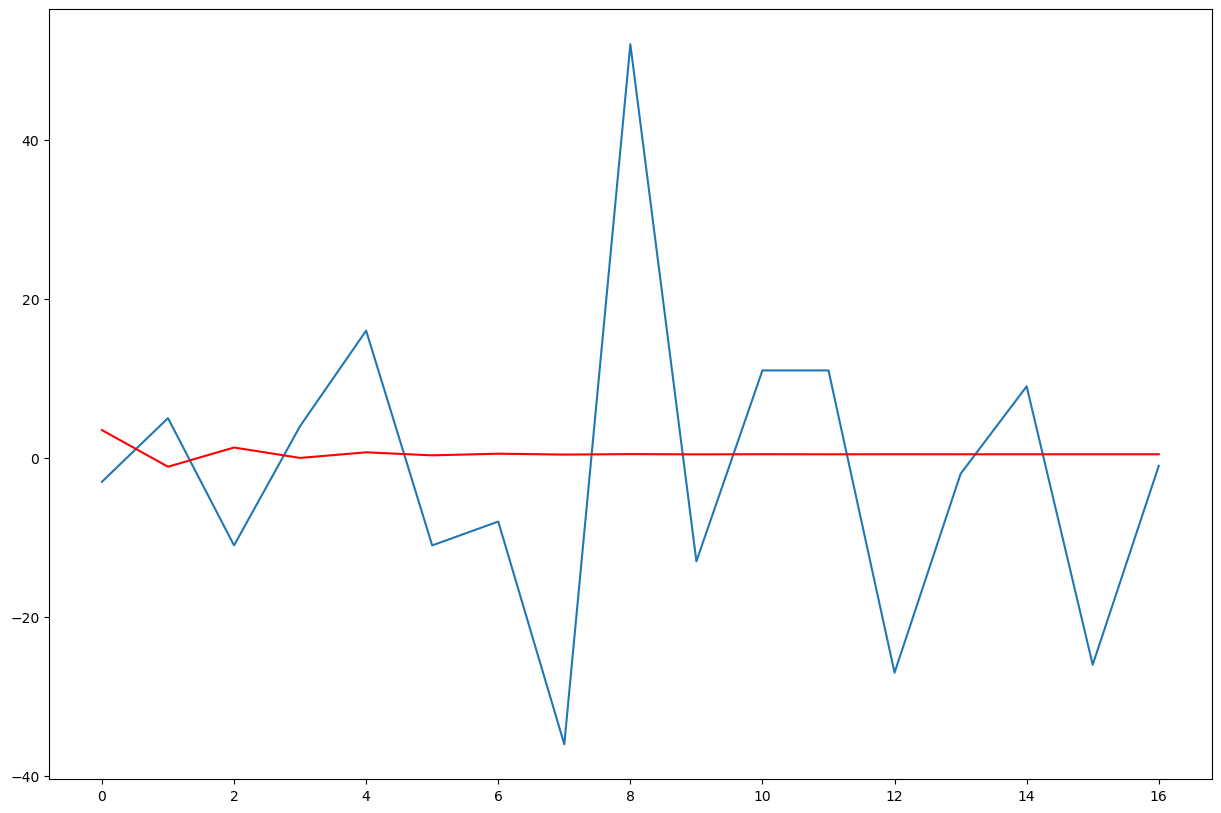

In [73]:
plt.plot(test)
plt.plot(predictions5, color='red')

### The MAE and RMSE values are higher compared to the previous model with order=(1,1,1) and seasonal_order=(1,1,1,12), indicating that the performance of the model has decreased. The MSE value is also higher, indicating that the predictions have more errors compared to the previous model. Moreover, the R2 score is negative, indicating that the model is performing worse than a horizontal line at predicting the data. Overall, this model may not be the best fit for the given data.